In [2]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

In [3]:
#Creating variables for longitutde and latitude arrays and then combining them together
lats = np.random.uniform(-90.00,90.00,size=1500)
lngs = np.random.uniform(-180.00,180.00, size=1500)

lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
#Add coordinates to a list
coordinates = list(lat_lngs)

In [5]:
#Create cities list to store city data from the loop
cities=[]

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if city is unique then we add it to the list
    if city not in cities:
        cities.append(city)
#print length of cities
len(cities)


626

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
city_data=[]

print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | aksarka
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | vagur
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | aklavik
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | oxford
Processing Record 21 of Set 1 | mala
Processing Record 22 of Set 1 | saint george
Processing R

In [8]:
len(city_data)

569

In [9]:
#converting array in dataframe
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-08-27 21:15:23,-33.93,18.42,55.00,93,40,4.70
1,Ushuaia,AR,2020-08-27 21:12:02,-54.80,-68.30,37.40,59,75,19.46
2,Saint-Philippe,RE,2020-08-27 21:12:05,-21.36,55.77,69.80,56,35,6.93
3,Butaritari,KI,2020-08-27 21:15:58,3.07,172.79,82.53,68,100,9.78
4,Aksarka,RU,2020-08-27 21:14:02,66.56,67.80,53.06,87,13,6.53
5,Norman Wells,CA,2020-08-27 21:15:58,65.28,-126.83,57.20,76,75,10.29
6,Bethel,US,2020-08-27 21:15:59,41.37,-73.41,87.80,48,75,9.17
7,Bluff,NZ,2020-08-27 21:15:59,-46.60,168.33,45.00,72,69,11.01
8,Puerto Ayora,EC,2020-08-27 21:15:59,-0.74,-90.35,77.00,57,83,26.40
9,Ponta Do Sol,PT,2020-08-27 21:15:59,32.67,-17.10,79.00,61,20,21.92


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
#Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/27/20'

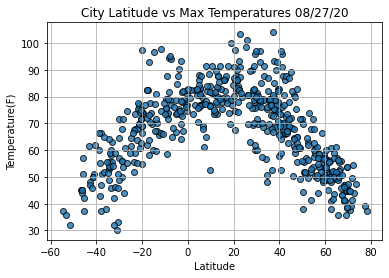

In [26]:
#Scatter Plot

plt.scatter(lats,max_temps, edgecolor="black", linewidth=1, marker="o", alpha=.8, label="Cities")

#graph properties
plt.title(f"City Latitude vs Max Temperatures "+today)
plt.ylabel("Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig1.png")

plt.show()

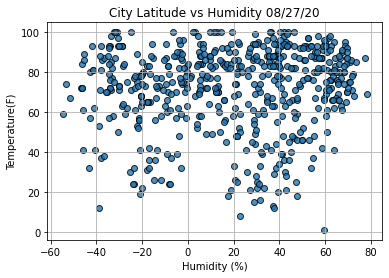

In [27]:
plt.scatter(lats,humidity, edgecolor="black", linewidth=1, marker="o", alpha=.8, label="Cities")

#graph properties
plt.title(f"City Latitude vs Humidity "+today)
plt.ylabel("Temperature(F)")
plt.xlabel("Humidity (%)")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig2.png")

plt.show()

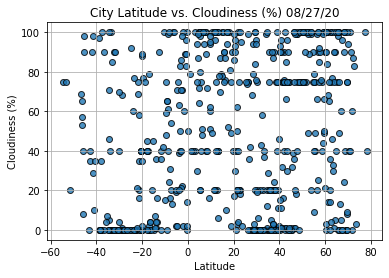

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()